In [1]:
conteudo = """Mes,Consumo_kWh,GeraçãoSolar_kWh,GeraçãoEolica_kWh
Jan,850,120,80
Fev,790,140,70
Mar,810,160,95
Abr,760,180,110
Mai,720,200,130
Jun,690,220,150
Jul,700,210,145
Ago,730,190,135
Set,760,170,110
Out,800,150,90
Nov,820,130,70
Dez,880,110,60
"""

with open("energia_renovavel.csv", "w", encoding="utf-8") as f:
    f.write(conteudo)

print("Arquivo criado com sucesso!")


Arquivo criado com sucesso!



### DADOS ANALISADOS ###

    Mes  Consumo_kWh  GeraçãoSolar_kWh  GeraçãoEolica_kWh  \
0   Jan          850               120                 80   
1   Fev          790               140                 70   
2   Mar          810               160                 95   
3   Abr          760               180                110   
4   Mai          720               200                130   
5   Jun          690               220                150   
6   Jul          700               210                145   
7   Ago          730               190                135   
8   Set          760               170                110   
9   Out          800               150                 90   
10  Nov          820               130                 70   
11  Dez          880               110                 60   

    EnergiaRenovavel_kWh  PercentualAtendido_%  ConsumoPosRenovavel_kWh  
0                    200             23.529412                      650  
1                    210       

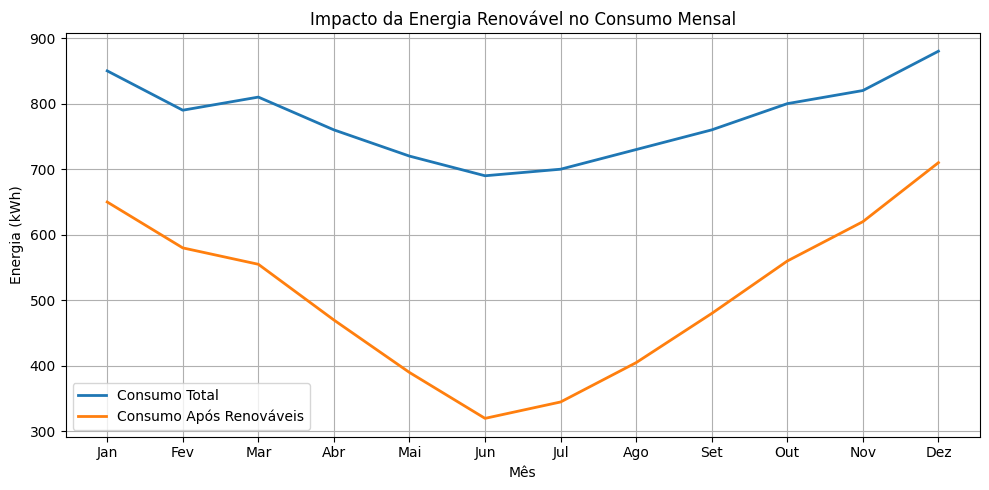

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# =============================
# 1. Carregar os dados
# =============================
df = pd.read_csv("energia_renovavel.csv")

# Energia total renovável
df["EnergiaRenovavel_kWh"] = df["GeraçãoSolar_kWh"] + df["GeraçãoEolica_kWh"]

# % de cobertura renovável do consumo
df["PercentualAtendido_%"] = (df["EnergiaRenovavel_kWh"] / df["Consumo_kWh"]) * 100

# Consumo restante após usar energia renovável
df["ConsumoPosRenovavel_kWh"] = df["Consumo_kWh"] - df["EnergiaRenovavel_kWh"]
df["ConsumoPosRenovavel_kWh"] = df["ConsumoPosRenovavel_kWh"].clip(lower=0)

# Economia anual
economia_total = df["EnergiaRenovavel_kWh"].sum()


print("\n### DADOS ANALISADOS ###\n")
print(df)

print("\n### RESULTADOS ###")
print(f"Total de energia renovável gerada no ano: {economia_total} kWh")

percentual_medio = df['PercentualAtendido_%'].mean()
print(f"Cobertura média do consumo por energia renovável: {percentual_medio:.2f}%")

# =============================
# 2. Gráfico (opcional)
# =============================
plt.figure(figsize=(10,5))
plt.plot(df["Mes"], df["Consumo_kWh"], label="Consumo Total", linewidth=2)
plt.plot(df["Mes"], df["ConsumoPosRenovavel_kWh"], label="Consumo Após Renováveis", linewidth=2)
plt.title("Impacto da Energia Renovável no Consumo Mensal")
plt.xlabel("Mês")
plt.ylabel("Energia (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
